## REIHA J R    NULL TECHNOLOGIES

# TASK 1

###  Fine-Tune a Model: Description: Fine-tune a pre-trained CNN model (e.g., DeepFace or any of your choice) for age detection on the UTK dataset. Description: GUI is not necessary. It will be evaluated on the basis of accuracy score.

## loading data

In [1]:
import os
import numpy as np
import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


C:\Users\reiha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
BASE_DIR = 'C:/Users/reiha/Downloads/archive (14)/utkface_aligned_cropped/UTKFace'

age_labels = []
image_paths = []

# Get all the image filenames and shuffle them
image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

# Loop through all the images and extract the labels
for image in tqdm(image_filenames):
    image_path = os.path.join(BASE_DIR, image)
    
    # Extract labels from the filename (format: age_gender_race.txt)
    img_components = image.split('_')
    age_label = int(img_components[0])  # Extract age label
    
    # Append the image path and label
    age_labels.append(age_label)
    image_paths.append(image_path)

# Convert labels to numpy arrays
age_labels = np.array(age_labels)
image_paths = np.array(image_paths)

# Print the number of samples and first few labels
print(f'Number of age_labels: {len(age_labels)}, Number of image_paths: {len(image_paths)}')


100%|████████████████████████████████████████████████████████████████████████| 23708/23708 [00:00<00:00, 144309.61it/s]

Number of age_labels: 23708, Number of image_paths: 23708


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_age_train, y_age_test = train_test_split(
    X, age_labels, test_size=0.2, random_state=42
)

print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
print(f'y_age_train shape: {y_age_train.shape}, y_age_test shape: {y_age_test.shape}')


In [4]:
import cv2
import numpy as np
from tqdm import tqdm

def preprocess_images(image_paths, img_size=(224, 224), batch_size=32):
    for i in range(0, len(image_paths), batch_size):
        batch_paths = image_paths[i:i+batch_size]
        batch_images = []
        
        for img_path in batch_paths:
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = img.astype(np.float32) / 255.0  # Convert to float32 & normalize
            batch_images.append(img)
        
        yield np.array(batch_images)  # Yield batch instead of storing all images

# Usage: Load images batch by batch to save memory
image_generator = preprocess_images(image_paths)

# Process one batch at a time (instead of all at once)
for X_batch in image_generator:
    print(f'Processed batch shape: {X_batch.shape}')


Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch shape: (32, 224, 224, 3)
Processed batch 

## 1. Splitting the Data into Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split

# Assuming `age_labels` is a NumPy array containing age labels for the images
X_train, X_test, y_age_train, y_age_test = train_test_split(
    image_paths, age_labels, test_size=0.2, random_state=42
)

print(f'X_train size: {len(X_train)}, X_test size: {len(X_test)}')
print(f'y_age_train size: {len(y_age_train)}, y_age_test size: {len(y_age_test)}')


X_train size: 18966, X_test size: 4742
y_age_train size: 18966, y_age_test size: 4742


## 2. Load Pre-trained ResNet50 Model for Fine-Tuning

In [8]:
# Load ResNet50 pre-trained on ImageNet without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ensure the base model is not trainable initially
base_model.trainable = False

# Define the model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Explicitly define input shape
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='linear')  # Output for regression
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='mean_absolute_error', metrics=['mae'])

# Summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## 3. Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply data augmentation only to the training set


## 4. Define Data Generator for Memory Efficiency

In [10]:
def image_generator(image_paths, labels, batch_size=32, img_size=(224, 224)):
    while True:
        for i in range(0, len(image_paths), batch_size):
            batch_paths = image_paths[i:i+batch_size]
            batch_labels = labels[i:i+batch_size]
            batch_images = []
            
            for img_path in batch_paths:
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                img = img.astype(np.float32) / 255.0  # Normalize
                batch_images.append(img)

            yield np.array(batch_images), np.array(batch_labels)


## 5. Training the Model

In [11]:
# Training generator
train_generator = image_generator(X_train, y_age_train, batch_size=32)
test_generator = image_generator(X_test, y_age_test, batch_size=32)

# Train the model (initial training with frozen ResNet50 layers)
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_test) // 32
)


Epoch 1/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 602s 1s/step - loss: 21.6278 - mae: 21.6278 - val_loss: 14.9668 - val_mae: 14.9668
Epoch 2/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 619s 1s/step - loss: 15.0138 - mae: 15.0138 - val_loss: 14.9629 - val_mae: 14.9629
Epoch 3/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 442s 747ms/step - loss: 14.9489 - mae: 14.9489 - val_loss: 14.9286 - val_mae: 14.9286
Epoch 4/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 438s 740ms/step - loss: 14.9211 - mae: 14.9211 - val_loss: 14.9371 - val_mae: 14.9371
Epoch 5/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 436s 737ms/step - loss: 14.9086 - mae: 14.9086 - val_loss: 14.9120 - val_mae: 14.9120
Epoch 6/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 437s 738ms/step - loss: 14.8837 - mae: 14.8837 - val_loss: 14.8839 - val_mae: 14.8839
Epoch 7/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 438s 740ms/step - loss: 14.9291 - mae: 14.9291 - val_loss: 14.8902 - val_mae: 14.8902
Epoch 8/10
592/592 ━━━━━━━━━━━━━━━━━━━━ 434s 733ms/step - loss: 14.9728 - mae: 14.9728 - val_loss: 14.8508 - val_mae: 14.850

## 6. Unfreeze Some Layers of ResNet50 for Fine-Tuning

In [12]:
# Unfreeze some layers of ResNet50
base_model.trainable = True

# Freeze first 100 layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Re-compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='mean_absolute_error', metrics=['mae'])

# Continue fine-tuning
history_finetune = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    steps_per_epoch=len(X_train) // 32,
    validation_steps=len(X_test) // 32
)


Epoch 1/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 1049s 2s/step - loss: 15.0524 - mae: 15.0524 - val_loss: 13.9731 - val_mae: 13.9731
Epoch 2/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 1138s 2s/step - loss: 8.7618 - mae: 8.7618 - val_loss: 12.4249 - val_mae: 12.4249
Epoch 3/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 1235s 2s/step - loss: 8.0884 - mae: 8.0884 - val_loss: 16.5034 - val_mae: 16.5034
Epoch 4/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 807s 1s/step - loss: 7.6549 - mae: 7.6549 - val_loss: 10.0441 - val_mae: 10.0441
Epoch 5/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 799s 1s/step - loss: 7.3237 - mae: 7.3237 - val_loss: 7.8271 - val_mae: 7.8271
Epoch 6/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 788s 1s/step - loss: 7.0548 - mae: 7.0548 - val_loss: 8.5066 - val_mae: 8.5066
Epoch 7/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 788s 1s/step - loss: 6.8464 - mae: 6.8464 - val_loss: 9.1060 - val_mae: 9.1060
Epoch 8/20
592/592 ━━━━━━━━━━━━━━━━━━━━ 787s 1s/step - loss: 6.6248 - mae: 6.6248 - val_loss: 6.9440 - val_mae: 6.9440
Epoch 9/20
592/592 ━━━━━━━━━━━━━━━━

## 7. Evaluate the Model

In [13]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(test_generator, steps=len(X_test) // 32)
print(f'Test Mean Absolute Error (MAE): {test_mae}')


148/148 ━━━━━━━━━━━━━━━━━━━━ 113s 762ms/step - loss: 7.8074 - mae: 7.8074
Test Mean Absolute Error (MAE): 7.888051509857178


## 8. Visualizing the Training Process

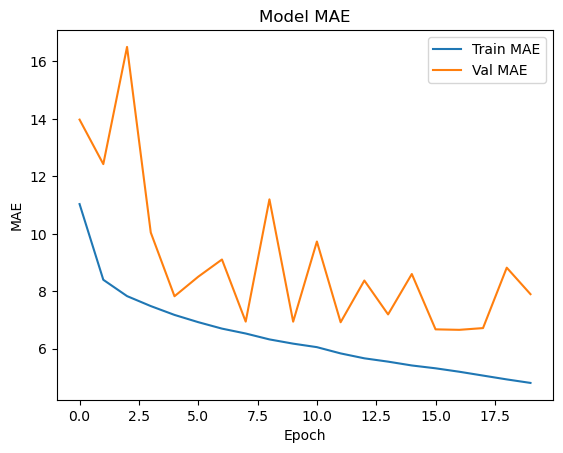

In [14]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history_finetune.history['mae'], label='Train MAE')
plt.plot(history_finetune.history['val_mae'], label='Val MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()
